         id    gender       PPE       DFA      RPDE  numPulses  \
0 -1.725191  0.968742  0.627644  0.256144  0.605835  -0.846892   
1 -1.725191  0.968742  0.121620 -0.080433  0.368415  -0.907404   
2 -1.725191  0.968742  0.617950 -0.349839  0.733609  -0.927575   
3 -1.711445 -1.032266 -1.980560  1.382279  0.753631  -1.472186   
4 -1.711445 -1.032266 -2.472989  1.398068  0.300123  -0.887233   

   numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0         -0.842373          0.933328           -0.407251     -0.054993  ...   
1         -0.902773          1.040014           -0.426092     -0.142570  ...   
2         -0.922907          1.084576           -0.443557     -0.214916  ...   
3         -1.466513          2.464215           -0.275316      0.710353  ...   
4         -0.882640          0.987044            3.143597      1.152045  ...   

   tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                  -0.445877                  -0.584822   
1   

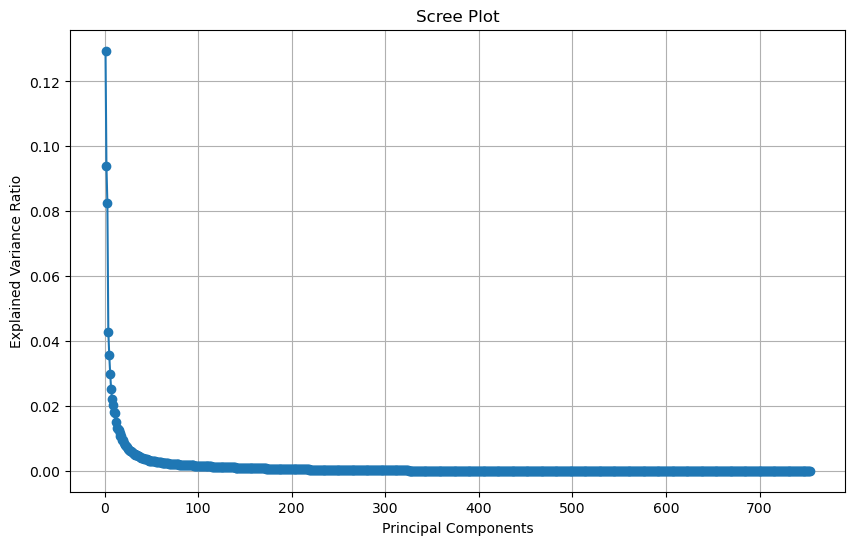

Logistic Regression Performance Before PCA:
Accuracy: 0.7268722466960352
Precision: 0.76
Recall: 0.9156626506024096

Logistic Regression Performance After PCA:
Accuracy: 0.8414096916299559
Precision: 0.8385416666666666
Recall: 0.9698795180722891


/Users/dhruvsaini/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


df = pd.read_csv("./Datasets/Q2_dataset.csv")
df.head()


# Separate features (X) and target (y)
X = df.drop('class', axis=1)  # Features (input variables)
y = df['class']               # Target variable (labels)

# Assuming 'X' contains numerical features that need to be standardized
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame 
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# Display the first few rows of the standardized DataFrame
print(X_standardized_df.head())


# Perform Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(X_standardized_df.cov())

# Sort the eigenvalues in descending order
eigenvalues_sorted = np.flip(eigenvalues)
eigenvectors_sorted = np.flip(eigenvectors, axis=1)

# Calculate the explained variance ratio for each eigenvalue
variance_ratio = eigenvalues_sorted / np.sum(eigenvalues_sorted)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(eigenvalues_sorted) + 1), variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Select the first 6 principal components
selected_components = eigenvectors_sorted[:, :6]

# Perform projection in the new feature space
projected_data = np.dot(X_standardized_df, selected_components)

# Step 1: Split the original data into training and testing sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a logistic regression model on the original data
logreg_orig = LogisticRegression()
logreg_orig.fit(X_train_orig, y_train)

# Step 3: Evaluate the model's performance on the testing set using accuracy, precision, and recall
y_pred_orig = logreg_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
precision_orig = precision_score(y_test, y_pred_orig)
recall_orig = recall_score(y_test, y_pred_orig)

print("Logistic Regression Performance Before PCA:")
print("Accuracy:", accuracy_orig)
print("Precision:", precision_orig)
print("Recall:", recall_orig)

# Step 4: Split the transformed data into training and testing sets
X_train_pca, X_test_pca, _, _ = train_test_split(projected_data, y, test_size=0.3, random_state=42)

# Step 5: Train a new logistic regression model on the transformed data
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)

# Step 6: Evaluate the new model's performance on the testing set using accuracy, precision, and recall
y_pred_pca = logreg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

# Step 7: Compare the performance before and after PCA


print("\nLogistic Regression Performance After PCA:")
print("Accuracy:", accuracy_pca)
print("Precision:", precision_pca)
print("Recall:", recall_pca)

